# Задание

Имеется текстовый протокол (лог), отображающий работу некоторого устройства. 
Требуется написать программу, осуществляющую обработку этого протокола
следующим образом:
1. Пользователь вводит даты для которых происходит обработка.
Например, с 01.01.2005 по 11.01.2005
2. Программа анализирует протокол за этот период и выводит в удобном для
просмотра виде следующую статистику
- число включений аппаратуры;
- список пользователей с указанием числа включений аппаратуры от их
имени. При этом включения "без пользователя" обрабатываются отдельно
- по каждому пользователю считается суммарное время проведенное им за
установкой


## Решение

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import random
import re
from datetime import datetime
from datetime import date
from collections import Counter

In [8]:
start_date_string = input("Введите начальную дату в формате ДД.ММ.ГГГГ: ")
end_date_string = input("Введите конечную дату в формате ДД.ММ.ГГГГ: ")
try:
    start_date = datetime.strptime(start_date_string, '%d.%m.%Y')
    end_date = datetime.strptime(end_date_string, '%d.%m.%Y')
except ValueError:
    print("Неверный формат даты. Используйте ДД.ММ.ГГГГ.")

Введите начальную дату в формате ДД.ММ.ГГГГ: 20.01.2000
Введите конечную дату в формате ДД.ММ.ГГГГ: 20.01.2008


In [30]:
def switch_on(start_date,end_date):
    with open('C:/Users/Sergey/Desktop/Goznak/person.log', 'r') as file:
        lines = file.readlines()
        in_between_dates = []
        for line in lines:
            match = re.search(r'Начало работы', line)
            if match:
                date_format_full = '%d.%m.%Y'
                date_format_short = '%d.%m.%y'
                date_line_full = re.search(r'\d{2}.\d{2}.\d{4}', line)  
                date_line_short = re.search(r'\d{2}.\d{2}.\d{2}', line) 
                if date_line_full:
                    try:
                        log_date = datetime.strptime(date_line_full.group(), date_format_full)
                    except ValueError:
                        continue
                elif date_line_short:
                    try:
                        log_date = datetime.strptime(date_line_short.group(), date_format_short)
                    except ValueError:
                        continue
                else: continue
                                        
                if start_date <= log_date <= end_date:
                    in_between_dates.append(log_date)
                    
    sns.set(context='poster', style='darkgrid', palette='bright', font='sans-serif', font_scale=0.5,color_codes=False, rc=None)                                    
    counts = Counter(in_between_dates)
    plt.figure(figsize=(15,5))
    plt.title(f'Количество включений аппаратуры с " {start_date.date()} " по " {end_date.date()} "',fontweight='bold',fontsize=22)
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    rgb = [r/255,g/255,b/255]
    ax=sns.barplot(x=list(counts.keys()), y=list(counts.values()), color=rgb)
    ax.bar(x='Общее количество', height=len(in_between_dates), color=rgb, label='Общее количество')
    plt.xlabel('Дата включения',fontsize=16)
    plt.ylabel('Количество включений, шт.',fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.show()

In [31]:
def switch_on_user(start_date,end_date):
    with open('C:/Users/Sergey/Desktop/Goznak/person.log', 'r') as file:
        lines = file.readlines()
        users=[]
        count_auto_switching=0
        for i in range(len(lines) - 1):
            current_line = lines[i]
            next_line = lines[i + 1]
            if "Начало работы" in current_line and "Оператор" in next_line:
                date_format_full = '%d.%m.%Y'
                date_format_short = '%d.%m.%y'
                date_line_full = re.search(r'\d{2}.\d{2}.\d{4}', current_line)  
                date_line_short = re.search(r'\d{2}.\d{2}.\d{2}', current_line)
                name = re.search(r'Оператор -\s+([А-Яа-яA-Za-z\s]+)', next_line)
                if date_line_full:
                    try:
                        log_date = datetime.strptime(date_line_full.group(), date_format_full)
                    except ValueError:
                        continue
                elif date_line_short:
                    try:
                        log_date = datetime.strptime(date_line_short.group(), date_format_short)
                    except ValueError:
                        continue
                else: continue
                                        
                if start_date <= log_date <= end_date:
                    if name:
                        name = name.group()
                    users.append(name) 
                  
        for i in range(len(lines) - 1):
            current_line = lines[i]
            next_line = lines[i + 1]
            if "Начало работы" in current_line and "Работа завершена" in next_line:
                date_format_full = '%d.%m.%Y'
                date_format_short = '%d.%m.%y'
                date_line_full = re.search(r'\d{2}.\d{2}.\d{4}', current_line)  
                date_line_short = re.search(r'\d{2}.\d{2}.\d{2}', current_line)
                
                if date_line_full:
                    try:
                        log_date = datetime.strptime(date_line_full.group(), date_format_full)
                    except ValueError:
                        continue
                elif date_line_short:
                    try:
                        log_date = datetime.strptime(date_line_short.group(), date_format_short)
                    except ValueError:
                        continue
                else: continue
                                        
                if start_date <= log_date <= end_date:
                    count_auto_switching+=1  
                    
    sns.set(context='poster', style='darkgrid', palette='bright', font='sans-serif', font_scale=0.5,color_codes=False, rc=None)                                    
    counts = Counter(users)
    plt.figure(figsize=(15,5))
    plt.title(f'Количество включений аппаратуры пользователями " {start_date.date()} " по " {end_date.date()} "',fontweight='bold',fontsize=22)
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    rgb = [r/255,g/255,b/255]
    ax=sns.barplot(x=list(counts.keys()), y=list(counts.values()), color=rgb)
    ax.bar(x='Автоматическое включение', height=count_auto_switching, color=rgb, label='Автоматическое включение')
    plt.xlabel('Имя пользователя',fontsize=16)
    plt.ylabel('Количество включений, шт.',fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.show()  

In [32]:
def persons_work_time(start_date,end_date):
    with open('C:/Users/Sergey/Desktop/Goznak/person.log', 'r') as file:
        content = file.read()
        log_parts = re.split(r'\*{80,}', content)
        person_time=[]
        for part in log_parts[1:]:  
            start_time_match = re.search(r"Начало работы :(\d{2}.\d{2}.\d{2,4} \d{1,2}:\d{2}:\d{2})", part)
            operator_match = re.search(r"Оператор - (.+)", part)
            end_time_match = re.search(r"Работа завершена: (\d{2}.\d{2}.\d{2,4} \d{1,2}:\d{2}:\d{2})", part)

            if start_time_match and operator_match and end_time_match:
                start_time_str = start_time_match.group(1)
                operator_str = operator_match.group(1)
                end_time_str = end_time_match.group(1)
         
                try:
                    start_time = datetime.strptime(start_time_str, "%d.%m.%Y %H:%M:%S")
                    end_time = datetime.strptime(end_time_str, "%d.%m.%Y %H:%M:%S")
                    work_time = end_time - start_time
                    work_time=work_time.total_seconds()
                except ValueError: 
                    start_time = datetime.strptime(start_time_str, "%d.%m.%y %H:%M:%S")
                    end_time = datetime.strptime(end_time_str, "%d.%m.%y %H:%M:%S")
                    work_time = end_time - start_time
                    work_time=work_time.total_seconds()
                
                log_date_ = start_time.strftime("%d.%m.%Y")
                log_date= datetime.strptime(log_date_, "%d.%m.%Y")
                
                              
                if start_date <= log_date <= end_date:
                    key = operator_str
                    value = work_time
                    pair = [key, value]
                    person_time.append(pair)
        df = pd.DataFrame(person_time, columns=['Operator_name', 'Time'])
        df['Time']=df['Time']/60    
    sns.set(context='poster', style='darkgrid', palette='bright', font='sans-serif', font_scale=0.5,color_codes=False, rc=None)                                    
    groupedvalues = df.groupby('Operator_name').sum().reset_index()
    plt.figure(figsize=(15,5))
    plt.title(f'Количество включений аппаратуры пользователями " {start_date.date()} " по " {end_date.date()} "',fontweight='bold',fontsize=22)
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    rgb = [r/255,g/255,b/255]
    sns.barplot(x='Operator_name', y='Time', data=groupedvalues, color=rgb)
    plt.xlabel('Имя пользователя',fontsize=16)
    plt.ylabel('Общее время использования, мин',fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.show()  


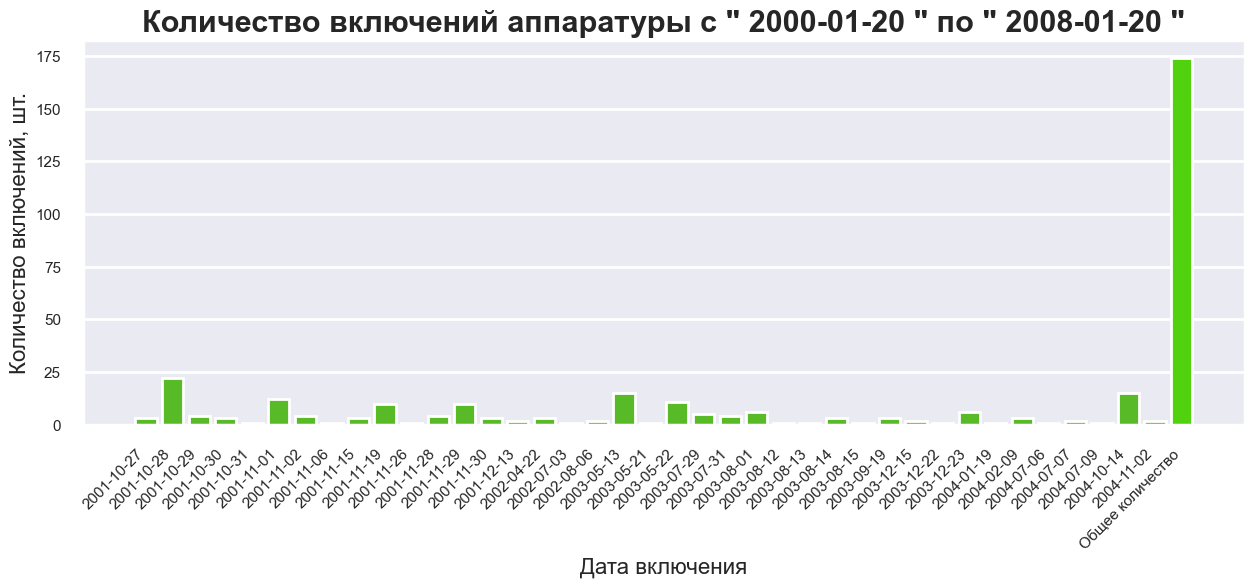

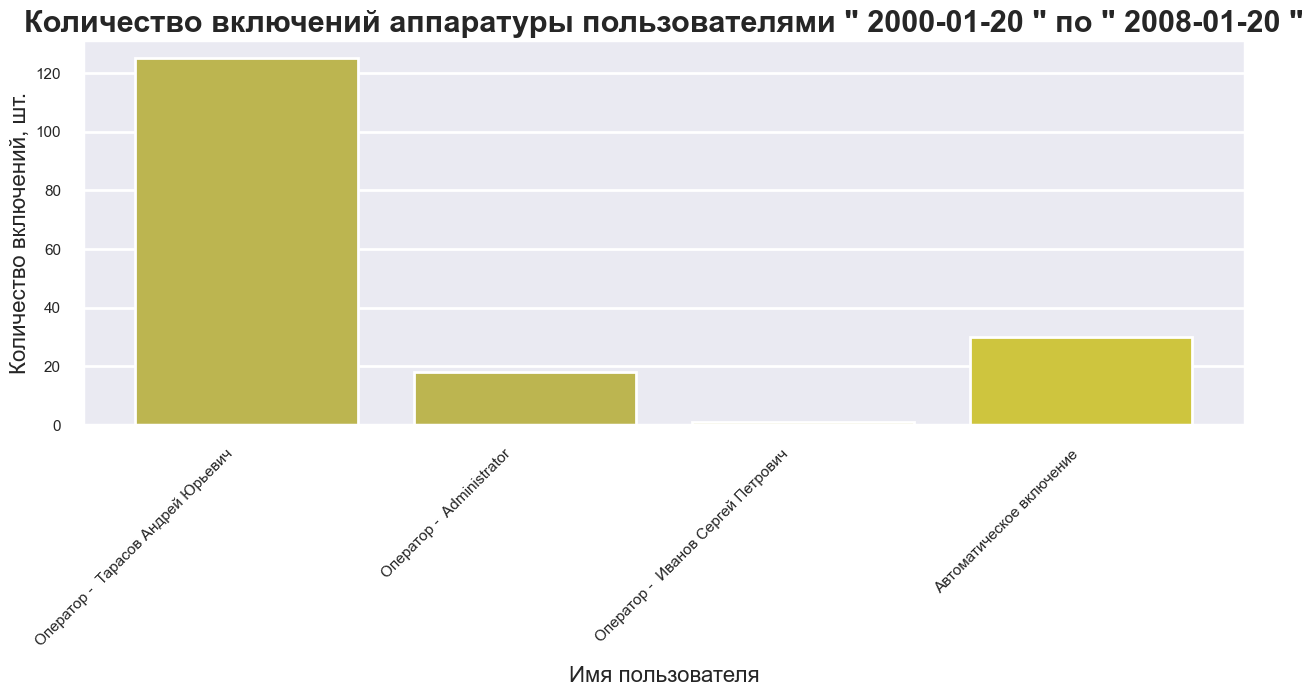

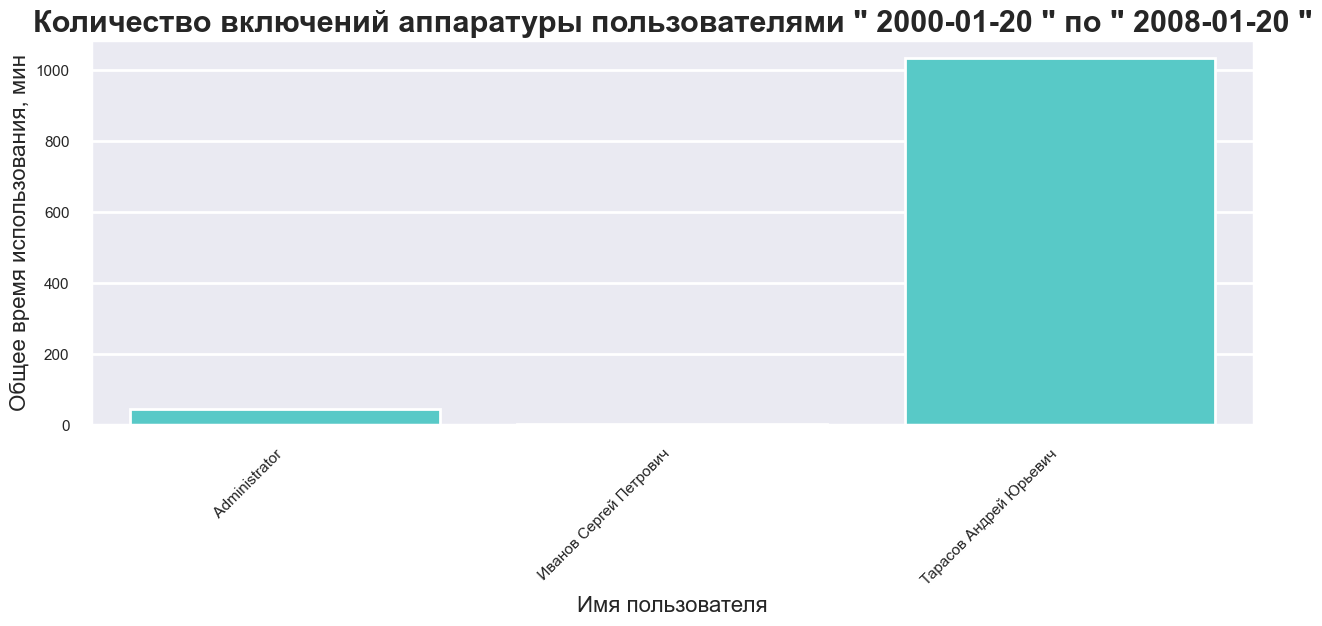

In [39]:
switch_on(start_date,end_date)
switch_on_user(start_date,end_date)
persons_work_time(start_date,end_date)

# Общий вывод

**Для получения отчета согласно заданию необходимо запустить программу и ввести две даты интересующего диапазона времени использования аппаратуры.**